## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score

Q. From where can we import LabelEncoder and StandardScaler?

A. from sklearn.preprocessing import LabelEncoder, StandardScaler.


Q. How can we import PCA?

A.&ensp;import scipy

&emsp; from sklearn.decompositon import PCA


## Loading the Dataset

In [38]:
data = pd.read_csv("music_dataset_mod.csv")
data

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


## Check Null values

In [3]:
data.isnull().sum()

,0
Tempo,0
Dynamics Range,0
Vocal Presence,0
Percussion Strength,0
String Instrument Detection,0
Electronic Element Presence,0
Rhythm Complexity,0
Drums Influence,0
Distorted Guitar,0
Metal Frequencies,0


Q. In which columns we have null values? How many null values are there in those columns?

A. "Genre" has null values. There are 110 null values in "Genre" column.

## Drop Null values

In [4]:
data = data.dropna()

In [6]:
data.isnull().sum()

,0
Tempo,0
Dynamics Range,0
Vocal Presence,0
Percussion Strength,0
String Instrument Detection,0
Electronic Element Presence,0
Rhythm Complexity,0
Drums Influence,0
Distorted Guitar,0
Metal Frequencies,0


## Encoding Categorical values using LabelEncoder()

In [7]:
le = LabelEncoder()
data["Genre"] = le.fit_transform(data["Genre"])

<ipython-input-7-de497b5f0a70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Genre"] = le.fit_transform(data["Genre"])


In [8]:
data

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,2
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,0
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,4
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,4


## Check Correlation between the features

In [9]:
correlation_matrix = data.iloc[:,0:12].corr()
correlation_matrix

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
Tempo,1.000000,-0.019799,0.019506,0.041447,-0.074421,0.009629,0.018964,0.389400,0.040765,0.033752,0.039567,-0.038901
Dynamics Range,-0.019799,1.000000,0.026418,-0.037116,0.127534,-0.204273,0.047814,-0.008319,-0.373529,-0.364005,-0.014778,0.015526
Vocal Presence,0.019506,0.026418,1.000000,0.012152,-0.056417,0.001731,0.041511,0.071056,0.005659,0.012855,0.041722,-0.053142
Percussion Strength,0.041447,-0.037116,0.012152,1.000000,-0.028638,-0.009360,-0.042843,0.524573,0.099178,0.089557,0.007340,0.024592
String Instrument Detection,-0.074421,0.127534,-0.056417,-0.028638,1.000000,-0.106855,-0.091424,-0.076020,-0.133776,-0.136804,-0.018462,-0.003055
Electronic Element Presence,0.009629,-0.204273,0.001731,-0.009360,-0.106855,1.000000,0.060110,0.050346,0.211896,0.189693,0.044057,-0.045359
Rhythm Complexity,0.018964,0.047814,0.041511,-0.042843,-0.091424,0.060110,1.000000,0.536786,0.030144,0.019255,0.003887,-0.000664
Drums Influence,0.389400,-0.008319,0.071056,0.524573,-0.076020,0.050346,0.536786,1.000000,0.084165,0.067735,0.036744,-0.010554
Distorted Guitar,0.040765,-0.373529,0.005659,0.099178,-0.133776,0.211896,0.030144,0.084165,1.000000,0.965909,0.012582,-0.057392
Metal Frequencies,0.033752,-0.364005,0.012855,0.089557,-0.136804,0.189693,0.019255,0.067735,0.965909,1.000000,0.025294,-0.061390


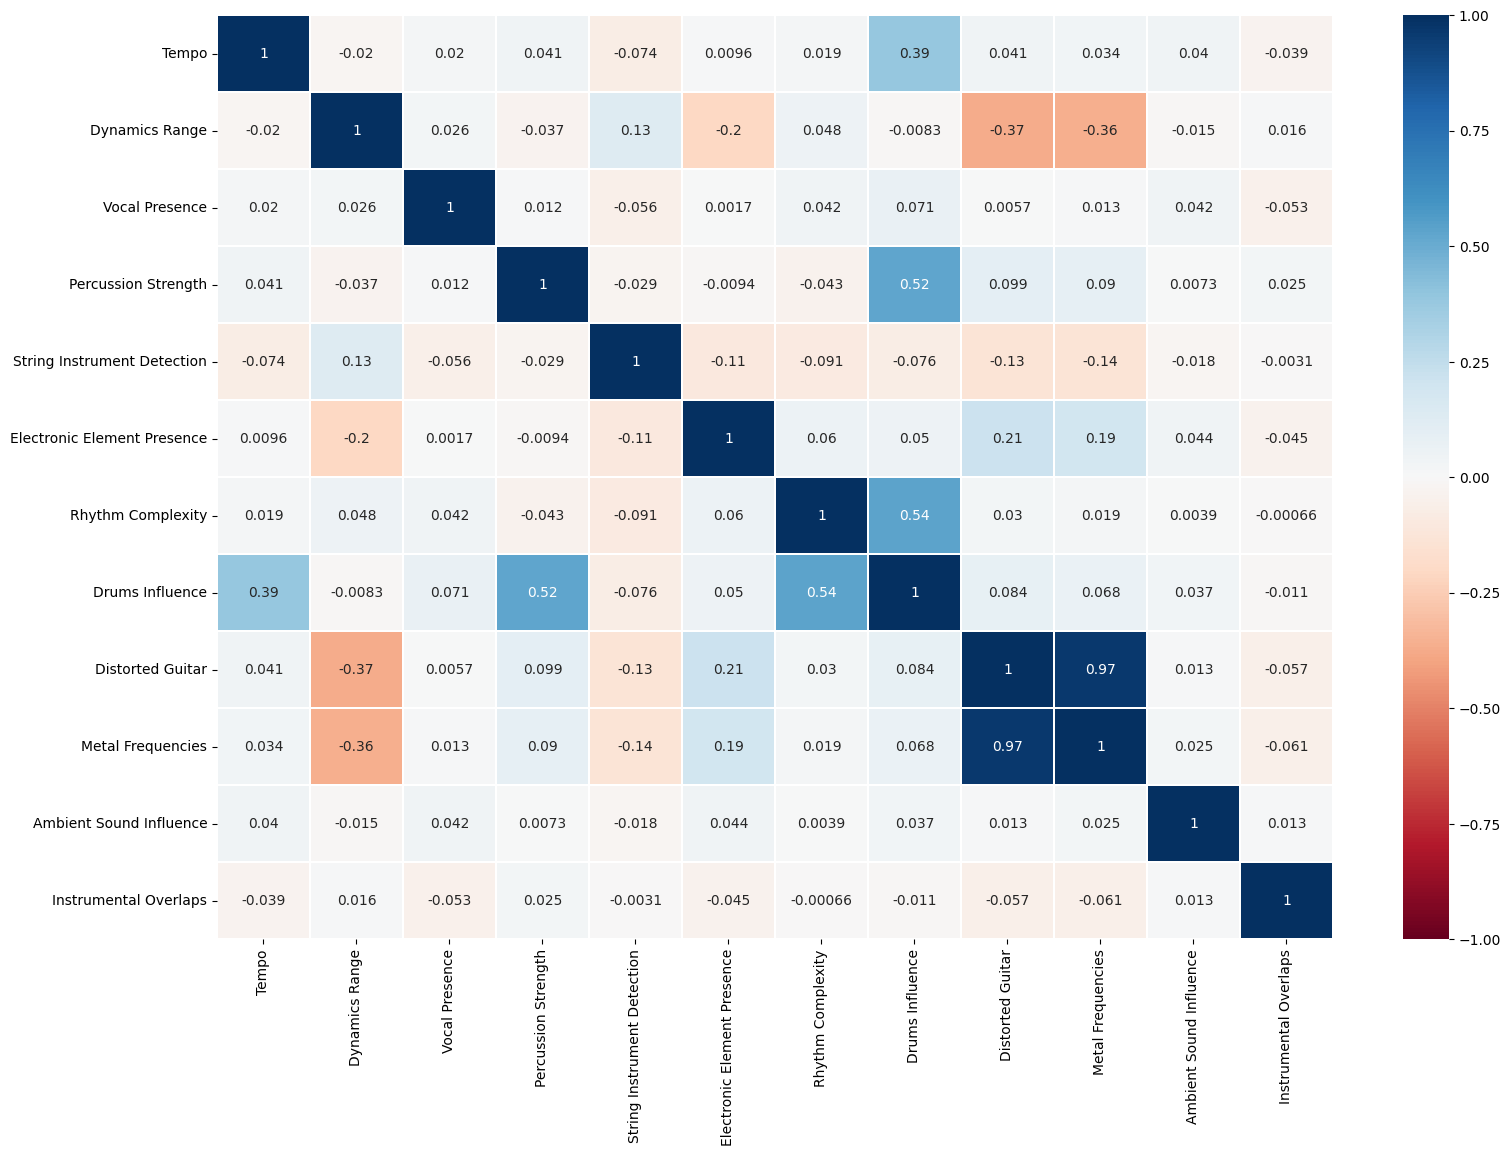

In [112]:
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix,
vmin=-1, vmax=1, annot = True, center=0,
cmap= "RdBu", linewidths=0.1
)

plt.show()

Q. Which features have highest correlation and what is their correlation coffiecient?

A. "Distorted Guitar" and "Metal Frequencies" have the highest correlation and their correlation coefficient is 0.97.

## Inputs and Target

In [11]:
inputs = data.drop(["Genre"],axis = 1)
target = data["Genre"]

## Splitting the Dataset

In [12]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.3, random_state = 42)

## Standardization of data

In [13]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## PCA

Text(0, 0.5, 'cumulative explained variance')

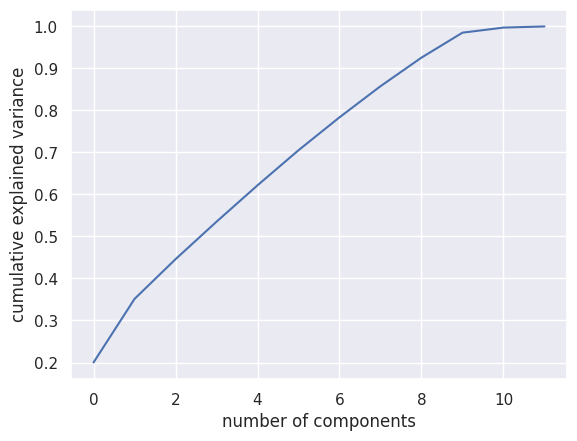

In [21]:
pca = PCA().fit(x_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Q. What is the number of components for cumulative explained variance of 0.95 or 95%

A. 9.

## PCA n_components for 95% cumulative explained variance

In [63]:
pca1 = PCA(n_components = 9)
x_train_reduced = pca1.fit_transform(x_train_scaled)
x_test_reduced = pca1.transform(x_test_scaled)

In [64]:
explained_variance = pca1.explained_variance_ratio_
explained_variance

array([0.20012882, 0.15126161, 0.09456995, 0.08922877, 0.08662344,
       0.08350594, 0.07835823, 0.07404745, 0.06808085])

In [65]:
x_train_reduced.shape

(623, 9)

In [66]:
x_test_reduced.shape

(267, 9)

## Logistic Regression after PCA

In [67]:
log = LogisticRegression(max_iter = 10000)
log.fit(x_train_reduced, y_train)

LogisticRegression(max_iter=10000)

In [68]:
y_pred = log.predict(x_test_reduced)

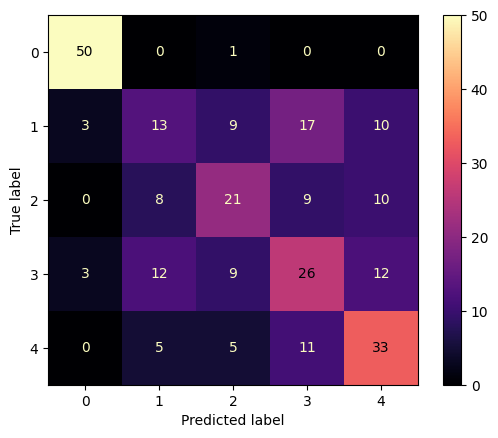

In [69]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = log.classes_, cmap = "magma")

In [70]:
accuracy_score(y_test, y_pred)

0.5355805243445693

In [71]:
print(classification_report(y_test, y_pred, target_names= le.classes_))

              precision    recall  f1-score   support

   Classical       0.89      0.98      0.93        51
     Country       0.34      0.25      0.29        52
     Hip-hop       0.47      0.44      0.45        48
        Jazz       0.41      0.42      0.42        62
        Rock       0.51      0.61      0.55        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



Q. Which genre has highest precision and which genre has lowest recall?

A. "Classical" has the highest precision of value 0.89 and "Country" has the lowest recall of value 0.25.

## Logistic Regression before PCA

In [72]:
log_no_pca = LogisticRegression(max_iter = 10000)
log_no_pca.fit(x_train_scaled, y_train)


LogisticRegression(max_iter=10000)

In [73]:
y_pred_no_pca = log_no_pca.predict(x_test_scaled)


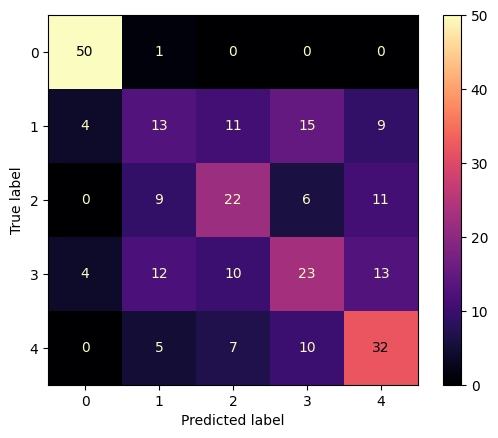

In [74]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_no_pca, labels = log_no_pca.classes_, cmap = "magma")


In [75]:
print(classification_report(y_test, y_pred_no_pca, target_names = le.classes_))

              precision    recall  f1-score   support

   Classical       0.86      0.98      0.92        51
     Country       0.33      0.25      0.28        52
     Hip-hop       0.44      0.46      0.45        48
        Jazz       0.43      0.37      0.40        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.52       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.52      0.51       267



Q. For what classes of genre, the precision and recall have degraded without PCA?

A. Precision degraded - "Classical", "Country", "Hip-hop" and "Rock"

&emsp; Recall degraded - "Jazz" and "Rock"

In [76]:
accuracy_score(y_test, y_pred_no_pca)

0.5243445692883895

## Predicting Null Genres using Logistic Regression model after PCA

In [132]:
data_copy = data
data_copy

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [133]:
data_na = data_copy[data_copy["Genre"].isnull()].copy()

In [134]:
data_na

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [135]:
data_na = data_na.drop(["Genre"], axis =1)

In [136]:
data_na_scaled = scaler.transform(data_na)
data_na_reduced = pca1.transform(data_na_scaled)

In [137]:
pred_values = log.predict(data_na_reduced)

## Converting numerical encoded Genre values to Genre names

In [138]:
data_na.loc[:, "pred_Genre"] = le.inverse_transform(pred_values)
data_na

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,pred_Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,Classical
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,Country
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,Country
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,Hip-hop
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,Hip-hop
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,Rock
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,Hip-hop
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,Hip-hop


In [139]:
print(data_na["pred_Genre"])

13     Classical
18       Country
22       Country
31       Hip-hop
42          Rock
         ...    
991      Hip-hop
992         Rock
993      Hip-hop
994      Hip-hop
995    Classical
Name: pred_Genre, Length: 110, dtype: object


Q. What is the predicted genre for 990th row?



In [140]:
data_na["pred_Genre"][990]

'Rock'

A. "Rock"